In [5]:
import datetime as dt
symbols = ['INTC','VZ','AAPL', 'AMZN', 'MSFT']

# shares amount for each symbol 
allocations = [25, 25, 25, 25, 25]
start_date = dt.date(2017,1,3)

#Benchmark Index
bench_symbol = "SPY"
#RF Syntax: 6 MO, 2 YR etc.
rate = '1 YR'
rf_start_date = dt.date(2017, 1, 3)

#For Quandl
api_key = 'Ms715aT97Bs1y4agihva'

#Dirctory Input For Data and Reports
root_path = "/Users/munkarkin/Library/Mobile Documents/com~apple~CloudDocs/Y4S1/EE4002R/utils"
end_date = dt.date.today()

In [18]:
import quandl
import os
import datetime as dt
import calendar

quandl.ApiConfig.api_key = api_key

folders = ['Daily Data', 'Daily Data/Portfolio', 'Daily Data/Benchmark']

for folder in folders:
    if not os.path.exists(folder):
        os.mkdir(folder)
        
#Modify Symbols List
for symbol in symbols:
    for ch in ['^', '.', '-', '/']:
        if ch in symbol:
            symbols.remove(symbol)
            symbol = symbol.replace(ch, '_')
            symbols.append(symbol)

# Update for Quandl
qsymbols = []
for i in range(len(symbols)):
    qsymbol = "WIKI/" + symbols[i].upper() + ".4"
    qsymbols.append(qsymbol)

smo = start_date.month
sday = start_date.day
syear = start_date.year
smonth = calendar.month_abbr[smo]

#Portfolio Data
port_data = quandl.get(qsymbols, start_date=start_date, end_date=end_date, collapse="daily")
port_data.columns = symbols

In [20]:
port_data.head()

,INTC,VZ,AAPL,AMZN,MSFT
Date,,,,,
2017-01-03,36.60,54.58,116.15,753.67,62.58
2017-01-04,36.41,54.52,116.02,757.18,62.30
2017-01-05,36.35,54.64,116.61,780.45,62.30
2017-01-06,36.48,53.26,117.91,795.99,62.84
2017-01-09,36.61,52.68,118.99,796.92,62.64


In [24]:
port_data.dtypes

INTC    float64
VZ      float64
AAPL    float64
AMZN    float64
MSFT    float64
dtype: object

In [22]:
import pandas as pd

In [27]:
port_val = port_data * allocations

port_val.head()

,INTC,VZ,AAPL,AMZN,MSFT
Date,,,,,
2017-01-03,915.00,1364.5,2903.75,18841.75,1564.5
2017-01-04,910.25,1363.0,2900.50,18929.50,1557.5
2017-01-05,908.75,1366.0,2915.25,19511.25,1557.5
2017-01-06,912.00,1331.5,2947.75,19899.75,1571.0
2017-01-09,915.25,1317.0,2974.75,19923.00,1566.0


In [29]:
port_val['Portfolio Value'] = port_val.sum(axis=1) # sums across each row 

port_val['Portfolio Value'].head()

Date
2017-01-03    25589.50
2017-01-04    25660.75
2017-01-05    26258.75
2017-01-06    26662.00
2017-01-09    26696.00
Name: Portfolio Value, dtype: float64

In [30]:
port_rets = port_val.pct_change()

In [31]:
#Calculate Portfolio Weights
assets = port_val.tail(1)
s = port_val.iloc[-1:, -1]
port_weights = assets / int(s)
port_weights = port_weights.transpose()
port_weights.columns = ["Weight"]
port_weights = port_weights.drop(port_weights.index[len(port_weights) - 1])

In [32]:
port_weights

,Weight
INTC,0.027620
VZ,0.025527
AAPL,0.090830
AMZN,0.807749
MSFT,0.048274


In [33]:
port_val.to_csv(root_path+'/Daily Data/Portfolio/Portfolio Value.csv',index=True)
port_rets.to_csv(root_path+'/Daily Data/Portfolio/Portfolio Returns.csv' ,index=True)
port_data.to_csv(root_path+'/Daily Data/Portfolio/Portfolio Daily Prices.csv' ,index=True)
port_weights.to_csv(root_path+'/Daily Data/Portfolio/Portfolio Weights.csv' ,index=True)

In [38]:

    'http://finance.google.com/finance/historical?q='+str(bench_symbol)+'&startdate='+ str(smonth) +'+'+ str(sday) +'+'+ str(syear) +'&enddate='+ str(emonth) +'+'+ str(eday) +'+'+ str(eyear) +'&output=csv'

'http://finance.google.com/finance/historical?q=SPY&startdate=Jan+3+2017&enddate=Aug+19+2019&output=csv'

In [42]:
import pandas_datareader as dr

bench_data = dr.DataReader('SPY','yahoo','01/03/2017', '08/19/2019')

In [43]:
bench_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,225.830002,223.880005,225.039993,225.240005,91366500.0,214.830276
2017-01-04,226.750000,225.610001,225.619995,226.580002,78744400.0,216.108322
2017-01-05,226.580002,225.479996,226.270004,226.399994,78379000.0,215.936646
2017-01-06,227.750000,225.899994,226.529999,227.210007,71559900.0,216.709229
2017-01-09,227.070007,226.419998,226.910004,226.460007,46939700.0,215.993881


In [44]:
bench_data = bench_data['Close']

In [50]:
bench_rets = bench_data.pct_change()
bench_rets.iloc[0] = 0 

In [51]:
bench_rets.head()

Date
2017-01-03    0.000000
2017-01-04    0.005949
2017-01-05   -0.000794
2017-01-06    0.003578
2017-01-09   -0.003301
Name: Close, dtype: float64

In [53]:
bench_data.to_frame().to_csv(root_path+'/Daily Data/Benchmark/Benchmark Price Data.csv' ,index=True)
bench_rets.to_frame().to_csv(root_path+'/Daily Data/Benchmark/Benchmark Returns.csv' ,index=True)


In [54]:
port_values = port_val['Portfolio Value']
port_values = pd.DataFrame(port_values)

port_values.head()

,Portfolio Value
Date,
2017-01-03,25589.50
2017-01-04,25660.75
2017-01-05,26258.75
2017-01-06,26662.00
2017-01-09,26696.00


In [57]:
perf = pd.merge(port_values, bench_data, left_index=True, right_index=True)

perf.head()

,Portfolio Value,Close
Date,,
2017-01-03,25589.50,225.240005
2017-01-04,25660.75,226.580002
2017-01-05,26258.75,226.399994
2017-01-06,26662.00,227.210007
2017-01-09,26696.00,226.460007


In [62]:
port_data = perf["Portfolio Value"]
bench_d = perf["Close"]

import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import inspect


In [100]:
port_data.head()

Date
2017-01-03    25589.50
2017-01-04    25660.75
2017-01-05    26258.75
2017-01-06    26662.00
2017-01-09    26696.00
Name: Portfolio Value, dtype: float64

In [104]:
port_data.tail()

Date
2018-03-21    48611.250
2018-03-22    47511.125
2018-03-23    46083.250
2018-03-26    48049.000
2018-03-27    46334.000
Name: Portfolio Value, dtype: float64

In [105]:
bench_d.head()

Date
2017-01-03    225.240005
2017-01-04    226.580002
2017-01-05    226.399994
2017-01-06    227.210007
2017-01-09    226.460007
Name: Close, dtype: float64

In [102]:
bench_d.tail()

Date
2018-03-21    270.429993
2018-03-22    263.670013
2018-03-23    258.049988
2018-03-26    265.109985
2018-03-27    260.600006
Name: Close, dtype: float64

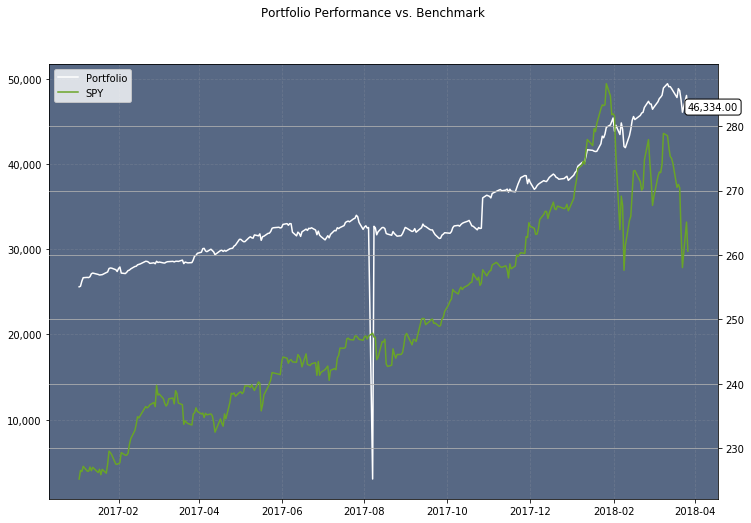

In [109]:

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, axisbg='#576884')

# plotting portfolio data
lns1 = ax.plot(port_data, linestyle='-', color="white", label='Portfolio')


ax2 = ax.twinx()
ax2.grid(None)
# plotting SPY data (benchmark)
lns2 = ax2.plot(bench_d, linestyle='-', color='#6aa527', label='SPY')



# added these three lines
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
ax.grid(linestyle='--', alpha=0.2)

ax.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

#Annotate Last Price
bbox_props = dict(boxstyle='round', fc='w', ec='k', lw=1)
ax.annotate("{:0,.2f}".format(port_val["Portfolio Value"][-1]), (port_val.index[-1], port_val["Portfolio Value"][-1]),
             xytext=(port_val.index[-1], port_val["Portfolio Value"][-1]), bbox=bbox_props)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.suptitle("Portfolio Performance vs. Benchmark")
#plt.savefig(root_path + '/Figures/port_perf.png')

call_name = inspect.stack()[1][3]

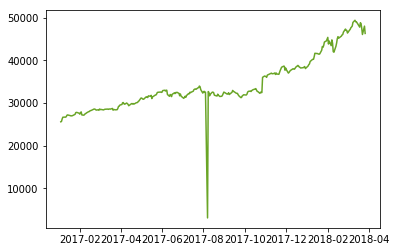

In [111]:
plt.plot(port_data, linestyle='-', color='#6aa527', label='SPY')

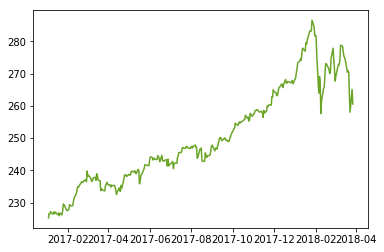

In [108]:
plt.plot(bench_d, linestyle='-', color='#6aa527', label='SPY')

## Portfolio Rebalancing 

Initial deployment:

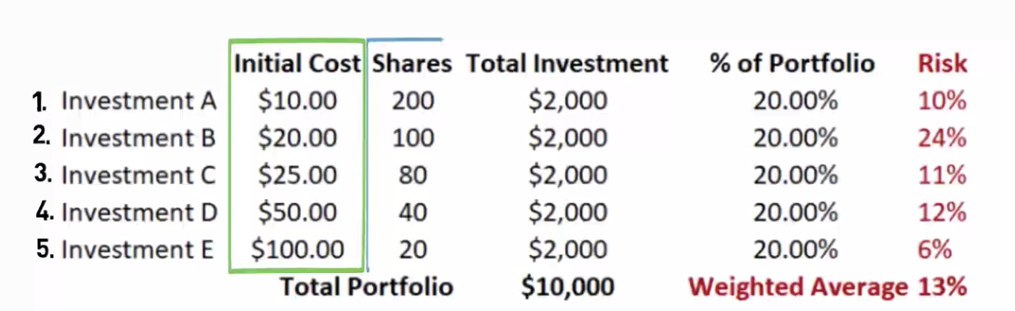

Some time after deployment, the fund has gone out of balance, increasing the risk profile although the portfolio has grown.

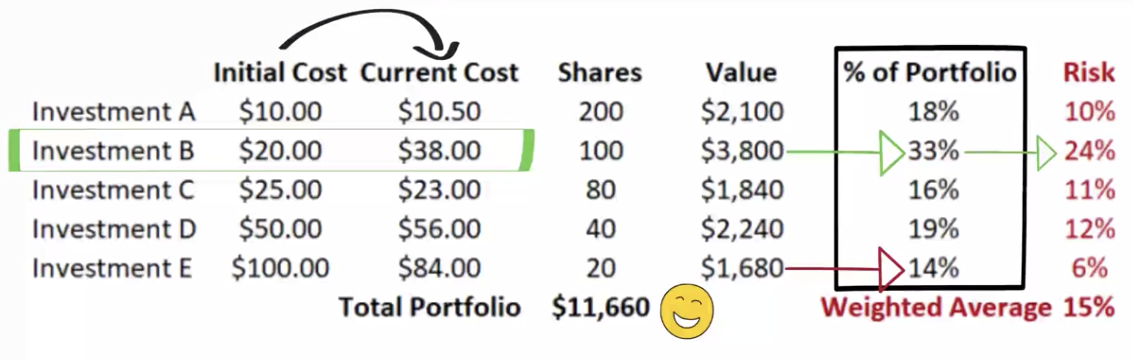

Hence, rebalancing is required so that the 

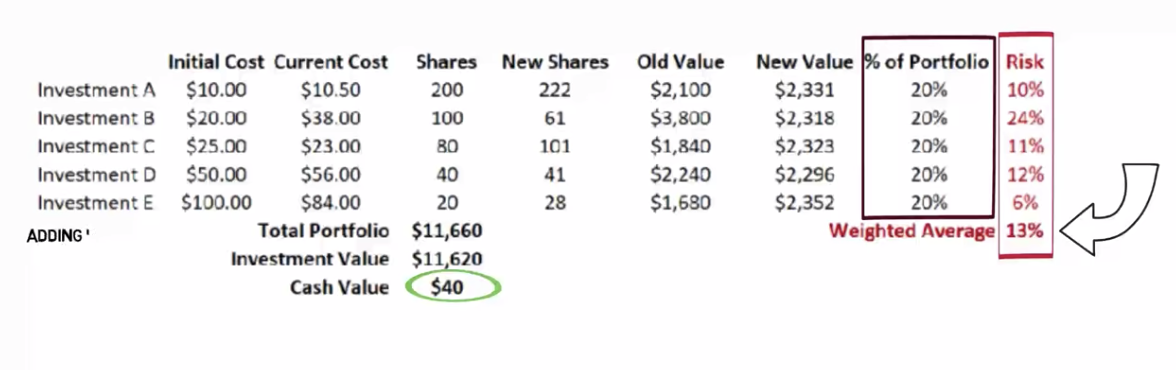